This notebook is part of the $\omega radlib$ documentation: http://wradlib.org/wradlib-docs.

Copyright (c) 2018, $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Clutter detection using the Gabella approach

In [1]:
import matplotlib.pyplot as pl
import numpy as np
import wradlib.vis as vis
import wradlib.clutter as clutter
import wradlib.util as util
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()
import numpy as np

/home/travis/miniconda/envs/wradlib/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Read the data

In [2]:
filename = util.get_wradlib_data_file('misc/polar_dBZ_fbg.gz')
data = np.loadtxt(filename)

### Apply filter

In [3]:
clmap = clutter.filter_gabella(data,
                               wsize=5,
                               thrsnorain=0.,
                               tr1=6.,
                               n_p=8,
                               tr2=1.3)

### Plot results

Text(0.5,1,'Cluttermap')

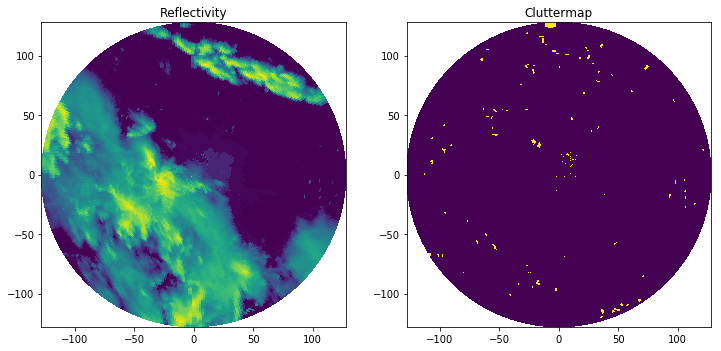

In [4]:
fig = pl.figure(figsize=(12,8))
ax = fig.add_subplot(121)
ax, pm = vis.plot_ppi(data, ax=ax)
ax.set_title('Reflectivity')
ax = fig.add_subplot(122)
ax, pm = vis.plot_ppi(clmap, ax=ax)
ax.set_title('Cluttermap')